In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv(r"C:\Users\kalyv\Desktop\data_banknote_authentication.csv", )
df

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   kurtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
df.describe()

,variance,skewness,kurtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
df['class'].value_counts(normalize=True)

0    0.555394
1    0.444606
Name: class, dtype: float64

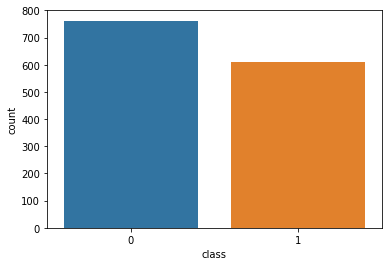

In [102]:
sns.countplot(df['class'])

In [7]:
pd.isna(df).sum()

variance    0
skewness    0
kurtosis    0
entropy     0
class       0
dtype: int64

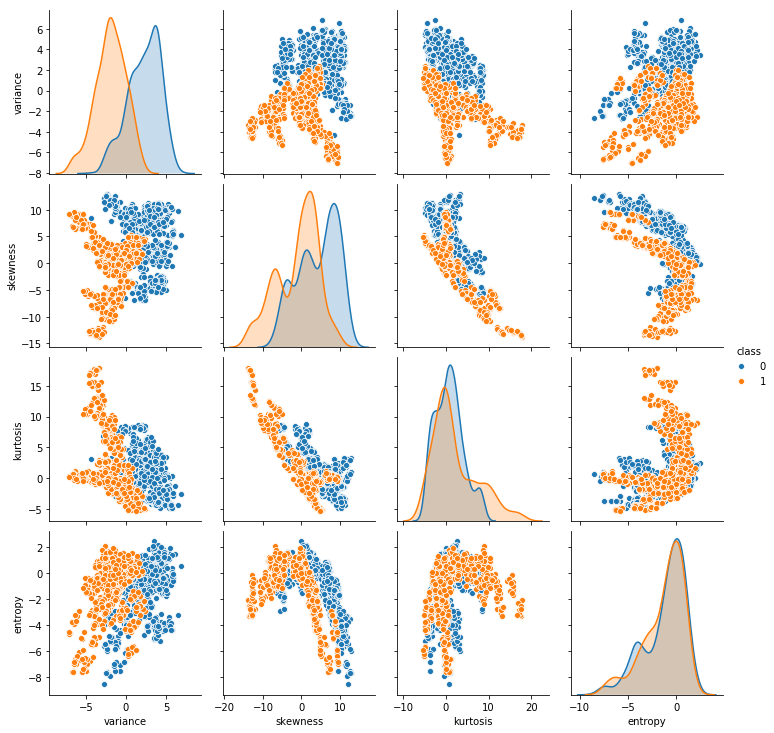

In [89]:
sns.pairplot(df, hue='class')

# Logistic Regression

In [76]:
from statsmodels.api import Logit
logit = Logit(y, X)
result = logit.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.097611
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.858   
Dependent Variable: class            AIC:              275.8434
Date:               2021-01-11 14:05 BIC:              296.7395
No. Observations:   1372             Log-Likelihood:   -133.92 
Df Model:           3                LL-Null:          -942.56 
Df Residuals:       1368             LLR p-value:      0.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     11.0000                                    
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
variance   -2.7285    0.2445  -11.1589  0.0000  -3.2078  -2.2493
skewness   -1.6781    0.1837   -9.1344  0.0000  -2.0381  -1.3180
kurtosis   -1.7833    0.1868   -9.5473  0.0000  -2.1495  -1.4172
entropy    -0.8361    0.1322   -6.3269  0.0000  -1.0952  -0.5771
===============================================================

"""

In [90]:
X = df.drop(['class'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print('accuracy on train: ', accuracy_score(y_train, logreg.predict(X_train)))
print('accuracy on test: ', accuracy_score(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

accuracy on train:  0.9916666666666667
accuracy on test:  0.9878640776699029
[[226   3]
 [  2 181]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



Text(0,0.5,'Log Odds')

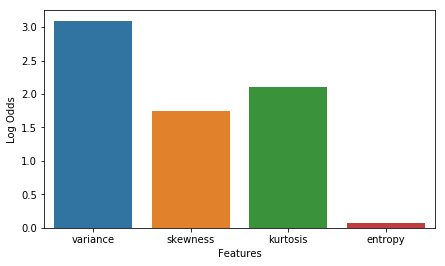

In [92]:
fig = plt.figure(figsize=(7,4))
sns.barplot(feature_names, abs(logreg.coef_[0]))
plt.xlabel('Features')
plt.ylabel('Log Odds')

Text(0.5,15,'Predicted values')

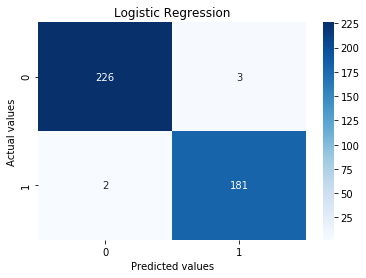

In [106]:
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap="Blues")
plt.title('Logistic Regression')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')

In [117]:
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve

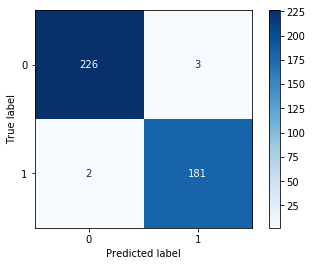

In [120]:
plot_confusion_matrix(logreg, X_test, y_test, cmap='Blues')

# Decision Tree

In [94]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print('accuracy on train: ', accuracy_score(y_train, tree.predict(X_train)))
print('accuracy on test: ', accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

accuracy on train:  1.0
accuracy on test:  0.9854368932038835
[[229   0]
 [  6 177]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       229
           1       1.00      0.97      0.98       183

    accuracy                           0.99       412
   macro avg       0.99      0.98      0.99       412
weighted avg       0.99      0.99      0.99       412



In [95]:
print(tree.tree_.node_count)
print(tree.tree_.max_depth)
print(tree.feature_importances_)

53
7
[0.61554292 0.18542548 0.16364999 0.03538161]


Text(0.5,15,'Predicted values')

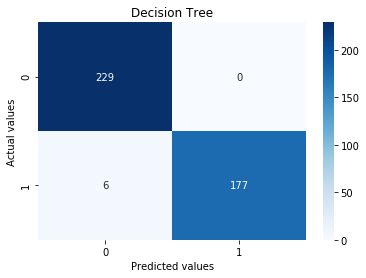

In [107]:
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap="Blues")
plt.title('Decision Tree')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')

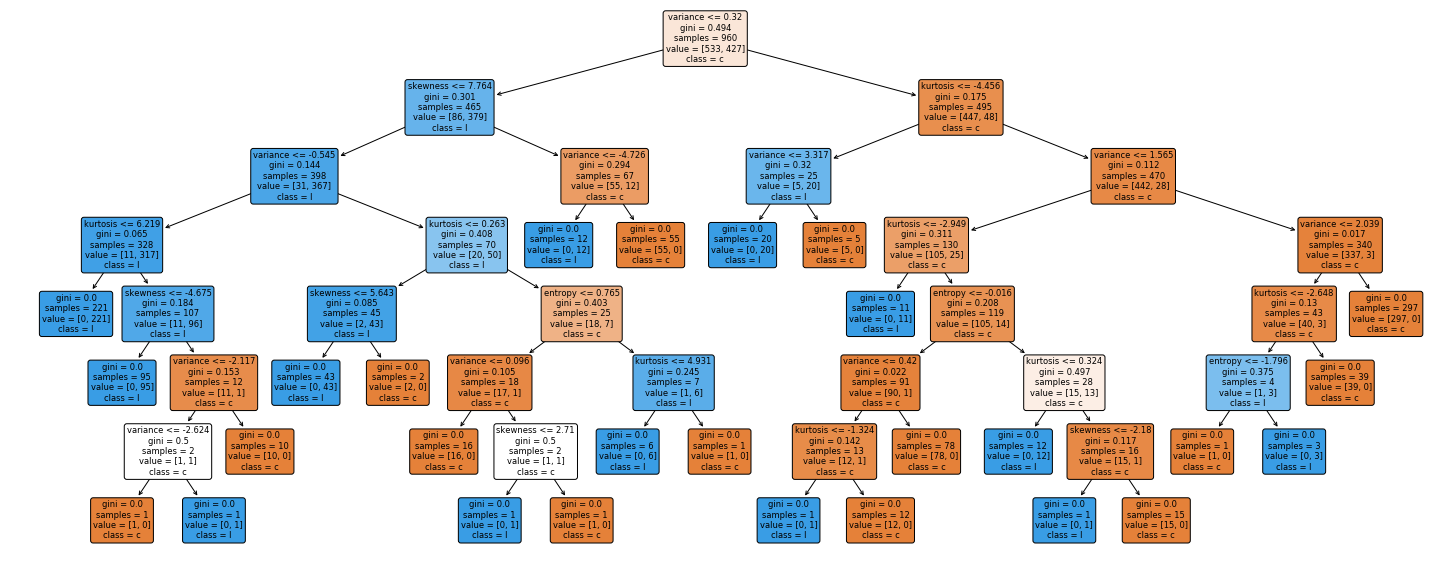

In [110]:
from sklearn.tree import plot_tree
feature_names = ['variance','skewness','kurtosis','entropy']
fig = plt.figure(figsize=(25,10))
_ = plot_tree(tree, filled=True, rounded=True, feature_names=feature_names, class_names='class')
plt.show()

Text(0,0.5,'Importance')

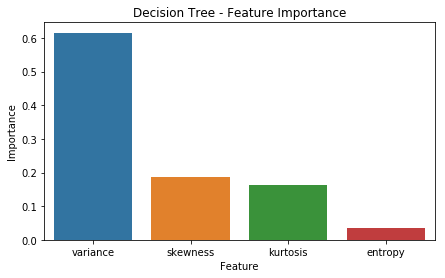

In [111]:
importance = tree.feature_importances_
fig = plt.figure(figsize=(7,4))
sns.barplot(feature_names, importance)
plt.title('Decision Tree - Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')

# GridSearchCV

In [97]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entropy'],
              'max_depth':range(1, tree.tree_.max_depth+1, 1),
              'max_features': range(1, len(tree.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

print(GR.best_estimator_.tree_.node_count)
print(GR.best_estimator_.tree_.max_depth)
print(GR.best_estimator_.feature_importances_)

37
6
[0.60053721 0.21019264 0.15897875 0.0302914 ]


In [98]:
y_pred_gr = GR.predict(X_test)

print('accuracy on train: ', accuracy_score(y_train, GR.predict(X_train)))
print('accuracy on test: ', accuracy_score(y_test, y_pred_gr))
print(confusion_matrix(y_test, y_pred_gr))
print(classification_report(y_test, y_pred_gr))

accuracy on train:  0.9979166666666667
accuracy on test:  0.9902912621359223
[[228   1]
 [  3 180]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       229
           1       0.99      0.98      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



Text(0.5,15,'Predicted values')

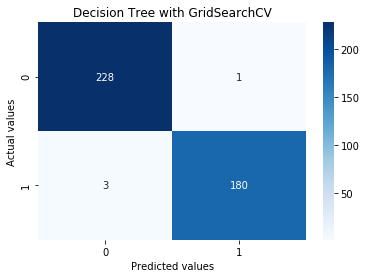

In [108]:
sns.heatmap(confusion_matrix(y_test, y_pred_gr), annot=True, fmt='d', cmap="Blues")
plt.title('Decision Tree with GridSearchCV')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')